In [2]:
import pandas as pd
data = pd.read_csv('course-13-student.csv')
data.head()

,school,sex,address,Pstatus,Pedu,reason,guardian,traveltime,studytime,schoolsup,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,U,A,4.0,course,mother,2,2,yes,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,U,T,1.0,course,father,1,2,no,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,U,T,1.0,other,mother,1,2,yes,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,U,T,3.0,home,mother,1,3,no,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,U,T,3.0,home,father,1,2,no,...,4,3,2,1,2,5,4,6,10,10


In [5]:
new_data = data.iloc[:, [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 14, 15, 24, 25, 26]]
new_data.head()

,school,sex,address,Pstatus,Pedu,reason,guardian,studytime,schoolsup,famsup,paid,higher,internet,G1,G2,G3
0,GP,F,U,A,4.0,course,mother,2,yes,no,no,yes,no,5,6,6
1,GP,F,U,T,1.0,course,father,2,no,yes,no,yes,yes,5,5,6
2,GP,F,U,T,1.0,other,mother,2,yes,no,yes,yes,yes,7,8,10
3,GP,F,U,T,3.0,home,mother,3,no,yes,yes,yes,yes,15,14,15
4,GP,F,U,T,3.0,home,father,2,no,yes,yes,yes,no,6,10,10


In [6]:
def grade_(x):
    x = int(x)
    if x < 5:
        return "poor"
    elif x >= 5 and x < 10:
        return "medium"
    elif x >= 10 and x < 15:
        return "good"
    else:
        return "excellent"


stu_data = new_data.copy()
stu_data["G1"] = pd.Series(map(lambda x: grade_(x), stu_data["G1"]))
stu_data["G2"] = pd.Series(map(lambda x: grade_(x), stu_data["G2"]))
stu_data["G3"] = pd.Series(map(lambda x: grade_(x), stu_data["G3"]))
stu_data.head()

,school,sex,address,Pstatus,Pedu,reason,guardian,studytime,schoolsup,famsup,paid,higher,internet,G1,G2,G3
0,GP,F,U,A,4.0,course,mother,2,yes,no,no,yes,no,medium,medium,medium
1,GP,F,U,T,1.0,course,father,2,no,yes,no,yes,yes,medium,medium,medium
2,GP,F,U,T,1.0,other,mother,2,yes,no,yes,yes,yes,medium,medium,good
3,GP,F,U,T,3.0,home,mother,3,no,yes,yes,yes,yes,excellent,good,excellent
4,GP,F,U,T,3.0,home,father,2,no,yes,yes,yes,no,medium,good,good


Classify the parent's education level.

In [7]:
def pedu_(x):
    x = int(x)
    if x > 3:
        return "high"
    elif x > 1.5:
        return "medium"
    else:
        return "low"


stu_data["Pedu"] = pd.Series(map(lambda x: pedu_(x), stu_data["Pedu"]))
stu_data.head()

,school,sex,address,Pstatus,Pedu,reason,guardian,studytime,schoolsup,famsup,paid,higher,internet,G1,G2,G3
0,GP,F,U,A,high,course,mother,2,yes,no,no,yes,no,medium,medium,medium
1,GP,F,U,T,low,course,father,2,no,yes,no,yes,yes,medium,medium,medium
2,GP,F,U,T,low,other,mother,2,yes,no,yes,yes,yes,medium,medium,good
3,GP,F,U,T,medium,home,mother,3,no,yes,yes,yes,yes,excellent,good,excellent
4,GP,F,U,T,medium,home,father,2,no,yes,yes,yes,no,medium,good,good


In [8]:
def replace_feature(data):

    for each in data.columns: 
        feature_list = data[each]
        unique_value = set(feature_list)
        i = 0
        for fea_value in unique_value:
            data[each] = data[each].replace(fea_value, i)
            i += 1
    return data

In [9]:
stu_data = replace_feature(stu_data)
stu_data.head()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8672\2597068849.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[each] = data[each].replace(fea_value, i)


,school,sex,address,Pstatus,Pedu,reason,guardian,studytime,schoolsup,famsup,paid,higher,internet,G1,G2,G3
0,0,0,1,0,0,0,0,1,0,1,1,0,1,3,3,3
1,0,0,1,1,1,0,2,1,1,0,1,0,0,3,3,3
2,0,0,1,1,1,3,0,1,0,1,0,0,0,3,3,1
3,0,0,1,1,2,2,0,2,1,0,0,0,0,0,1,0
4,0,0,1,1,2,2,2,1,1,0,0,0,1,3,1,1


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    stu_data.iloc[:, :-1], stu_data["G3"], test_size=0.3, random_state=5
)

X_test.head()

,school,sex,address,Pstatus,Pedu,reason,guardian,studytime,schoolsup,famsup,paid,higher,internet,G1,G2
306,0,1,1,0,2,0,1,0,1,1,1,0,1,0,0
343,0,0,1,0,2,2,2,1,1,0,1,0,0,3,3
117,0,1,1,1,2,2,2,0,1,1,1,0,0,1,1
50,0,0,1,1,2,0,0,1,1,0,0,0,0,1,1
316,0,0,1,1,1,0,0,1,1,0,0,0,0,3,3


In [11]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(criterion="entropy", random_state=34)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=34)

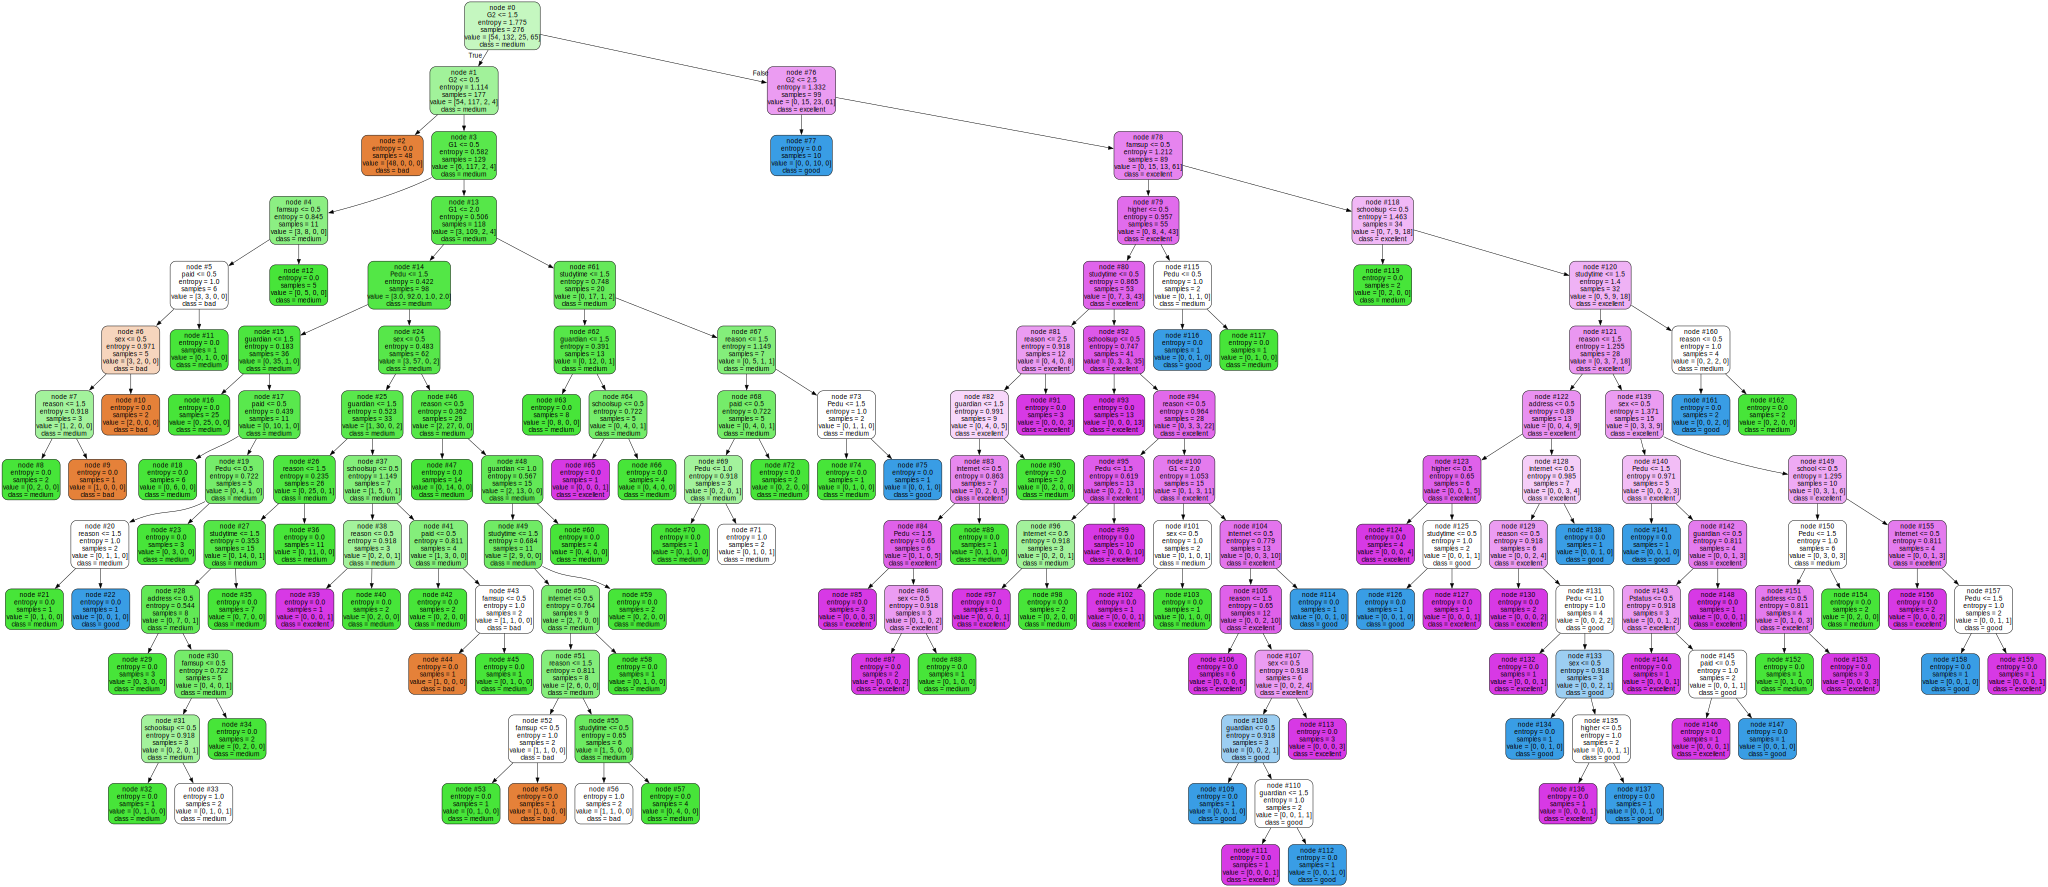

In [12]:
from sklearn.tree import export_graphviz
import numpy as np
import graphviz

img = export_graphviz(
    dt_model,
    out_file=None,
    feature_names=stu_data.columns[:-1].values.tolist(),  
    class_names=np.array(["bad", "medium", "good", "excellent"]), 
    filled=True,
    node_ids=True,
    rounded=True,
)

graphviz.Source(img)

In [13]:
y_pred = dt_model.predict(X_test) 
y_pred

array([0, 2, 1, 1, 3, 1, 3, 1, 1, 1, 1, 3, 1, 0, 1, 0, 1, 3, 1, 1, 1, 3,
       0, 1, 1, 1, 0, 0, 1, 1, 3, 3, 3, 3, 2, 3, 1, 1, 0, 3, 0, 0, 1, 1,
       2, 1, 1, 1, 1, 1, 0, 1, 1, 3, 1, 3, 0, 1, 1, 2, 1, 3, 1, 1, 1, 1,
       0, 0, 1, 3, 1, 3, 2, 1, 1, 1, 3, 0, 3, 0, 1, 0, 1, 1, 0, 2, 3, 3,
       1, 1, 2, 2, 0, 1, 1, 0, 2, 3, 0, 1, 3, 1, 0, 1, 2, 1, 1, 3, 1, 1,
       3, 1, 3, 0, 1, 1, 1, 0, 1], dtype=int64)

In [14]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7394957983193278